# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Import

In [2]:
df=pd.read_csv("Road Accident Data.csv")

# Explore the dataset

In [3]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [4]:
df.shape

(307973, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

# Data Cleaning

In [6]:
df.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [7]:
# Drop the Carriageway_Hazards column 
df = df.drop(columns=['Carriageway_Hazards'])

In [8]:
# Fill the road surface conditions with mode
mode_value = df['Road_Surface_Conditions'].mode()[0]
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(mode_value)

In [9]:
# Fill the Road Type with mode
mode_value_road_type = df['Road_Type'].mode()[0]
df['Road_Type'] = df['Road_Type'].fillna(mode_value_road_type)

In [10]:
# Fill Missing values with median or average time 
df['Time'] = df['Time'].fillna(df['Time'].mode()[0]) # Assuming filling with the most common time

In [11]:
# Fill the Weather conditions with mode
mode_value_weather = df['Weather_Conditions'].mode()[0]
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(mode_value_weather)


In [12]:
df.isnull().sum()

Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

# Data Types

In [13]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Light_Conditions            307973 non-null  object        
 8   Local_Authority_(District)  307973 non-null  object        
 9   Longitude                   307973 non-null  float64       
 10  Number_of_Casualties        307973 non-null  int64         
 11  Number_of_Vehicles          307973 non-

# Feature Engineering

In [15]:
# Hour of day
df['Hour'] = df['Time'].apply(lambda x: int(x.split(':')[0]))

In [16]:
df.dtypes

Accident_Index                        object
Accident Date                 datetime64[ns]
Day_of_Week                           object
Junction_Control                      object
Junction_Detail                       object
Accident_Severity                     object
Latitude                             float64
Light_Conditions                      object
Local_Authority_(District)            object
Longitude                            float64
Number_of_Casualties                   int64
Number_of_Vehicles                     int64
Police_Force                          object
Road_Surface_Conditions               object
Road_Type                             object
Speed_limit                            int64
Time                                  object
Urban_or_Rural_Area                   object
Weather_Conditions                    object
Vehicle_Type                          object
Hour                                   int64
dtype: object

In [17]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,...,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Hour
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,...,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car,15
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,...,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car,10
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,...,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car,14
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,...,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc,8
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,...,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car,17


# Exploratory Data Analysis (EDA)

In [18]:
df.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Hour
count,307973,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021-12-23 22:19:39.804722944,52.487005,-1.368884,1.356882,1.829063,38.866037,13.561913
min,2021-01-01 00:00:00,49.914488,-7.516225,1.000000,1.000000,10.000000,0.000000
25%,2021-06-28 00:00:00,51.485248,-2.247937,1.000000,1.000000,30.000000,10.000000
50%,2021-12-08 00:00:00,52.225943,-1.349258,1.000000,2.000000,30.000000,14.000000
75%,2022-06-25 00:00:00,53.415517,-0.206810,1.000000,2.000000,50.000000,17.000000
max,2022-12-31 00:00:00,60.598055,1.759398,48.000000,32.000000,70.000000,23.000000
std,NaN,1.339011,1.356092,0.815857,0.710477,14.032933,5.132574


## Visualization

### Accidents by Time of Day:

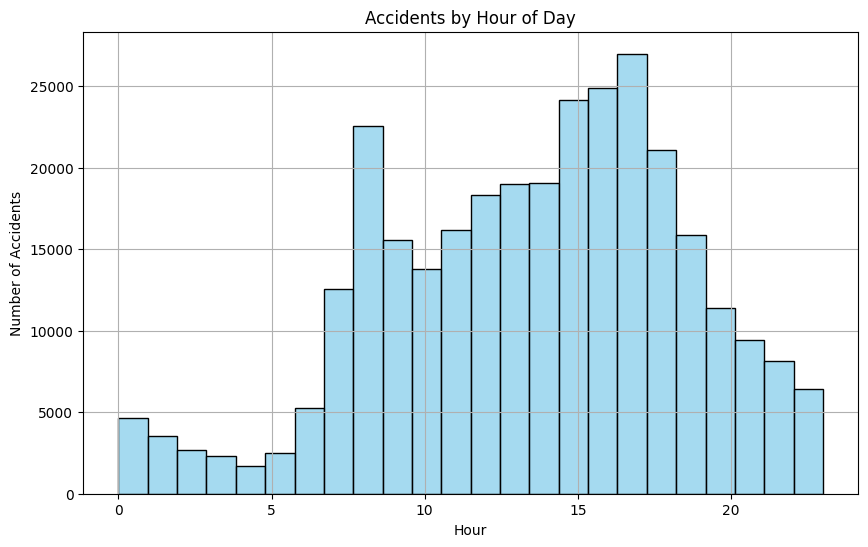

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=False, color='skyblue')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

**Observations**
- Accident frequency peaks during the daytime hours, especially between 15-18.
- There is a sharp drop-off in accidents during the late night/early morning hours.
- The highest number of accidents occurs around 16-17, reaching over 22,000.
- Accident rates are generally lower during the overnight and early morning hours.

### Accidents by Weather Conditions:

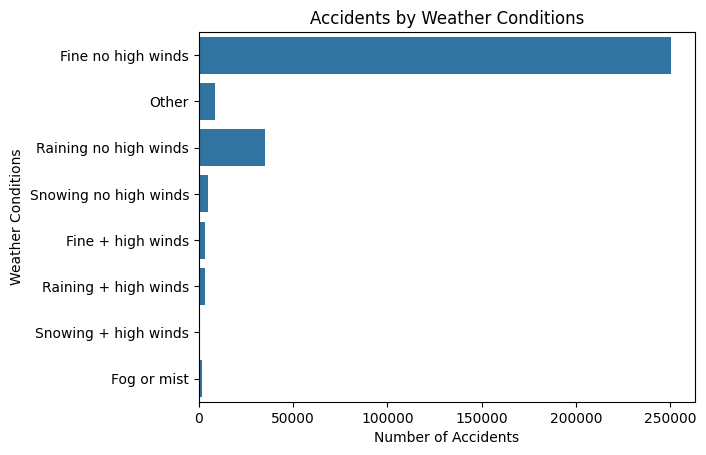

In [20]:
sns.countplot(y='Weather_Conditions', data=df)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Conditions')
plt.show()

**Observations**
- **Fine Weather Conditions**: The majority of accidents occur in fine weather with no high winds, indicating a significantly higher frequency of incidents compared to other weather conditions.
- **Adverse Weather**: There is a notable decrease in the number of accidents as the weather conditions worsen. For example, accidents during snowing with no high winds are significantly fewer than those in fine weather.
- **High Winds**: Adding high winds to any weather condition (fine, raining, snowing) generally results in a decrease in the number of accidents compared to the same condition without high winds.
- **Fog or Mist**: The fewest accidents are recorded in fog or mist, suggesting that such conditions might lead to more cautious driving or less traffic.

### Accidents by Road Conditions:

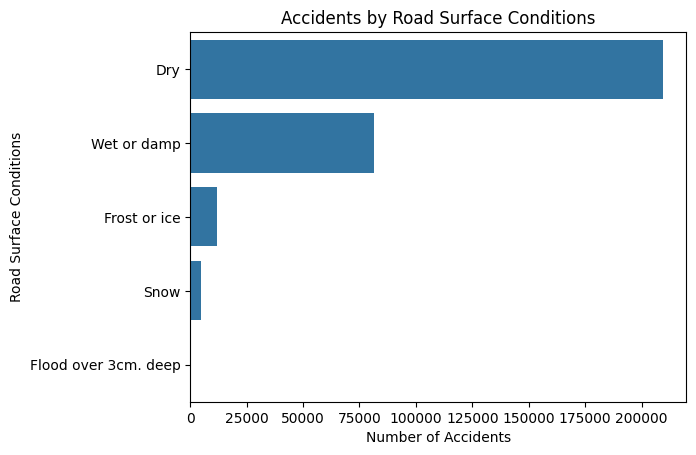

In [21]:
sns.countplot(y='Road_Surface_Conditions', data=df)
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Surface Conditions')
plt.show()

**Observations**
- **Dry Roads**: The highest number of accidents occur on dry roads, which might suggest higher traffic volumes during dry conditions.
- **Wet or Damp Roads**: There's a significant decrease in accidents on wet or damp roads compared to dry roads, yet it remains the second most common condition for accidents.
- **Frost or Ice**: Accidents significantly drop under frost or ice conditions, possibly due to reduced vehicle speeds and more cautious driving.
- **Snow**: Fewer accidents occur in snowy conditions, similar to frost or ice, likely due to cautious driving and possibly less traffic.
- **Flooding**: The fewest accidents are recorded on roads flooded over 3 cm deep, potentially reflecting very low traffic volumes under such extreme conditions.

### Bar Charts for Severity and Weather:

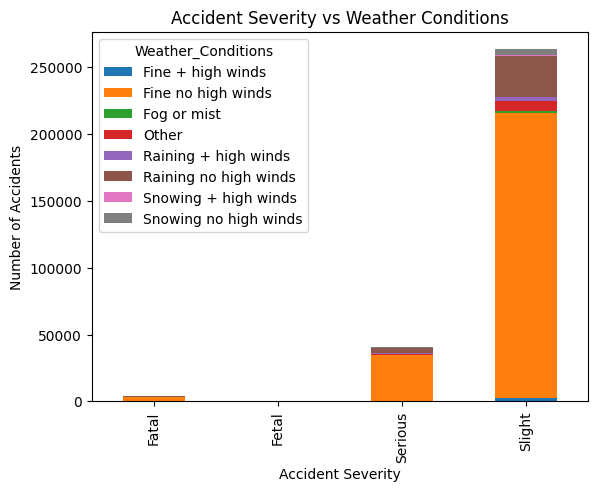

In [22]:
severity_weather = df.groupby(['Accident_Severity', 'Weather_Conditions']).size().unstack()
severity_weather.plot(kind='bar', stacked=True)
plt.title('Accident Severity vs Weather Conditions')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.show()

**Observations**
- **Most Accidents are Slight**: The vast majority of accidents, especially in less severe weather conditions, are of slight severity.
- **Fine Weather Leads**: Both 'Fine no high winds' and 'Fine + high winds' see the highest total numbers of accidents across all severities, suggesting that good weather conditions do not necessarily imply lower accident rates.
- **Lower Incidence in Adverse Weather**: Serious and fatal accidents are less frequent in conditions such as 'Snowing + high winds' and 'Fog or mist', likely due to reduced traffic or more cautious driving in such conditions.

### Accident by day of the week

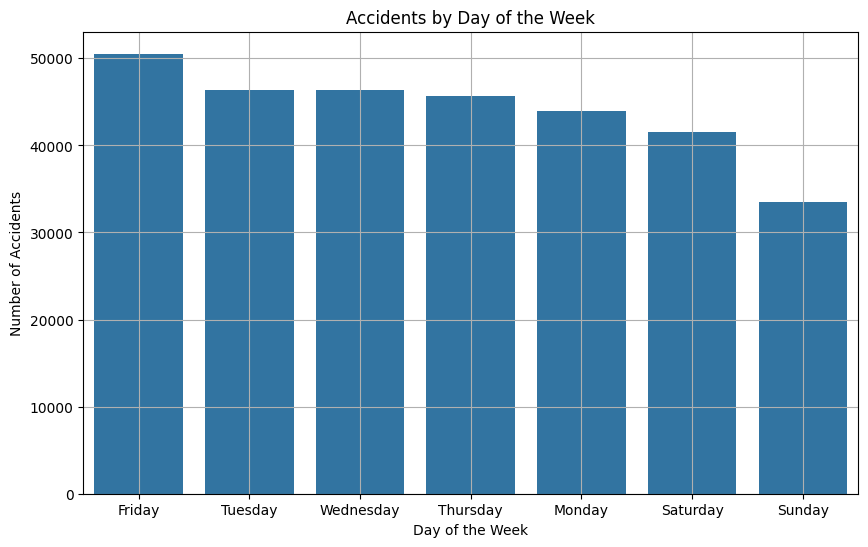

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=df, order=df['Day_of_Week'].value_counts().index)
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


**Observations**
- Friday has the highest number of accidents, with over 50,000 accidents.
- Tuesday and Wednesday also have a relatively high number of accidents, around 45,000 each.
- Thursday and Monday have slightly fewer accidents, around 42,000 each.
- Saturday and Sunday have the lowest number of accidents, around 35,000 and 32,000 respectively.

### Pie Chart: Accident Severity Distribution

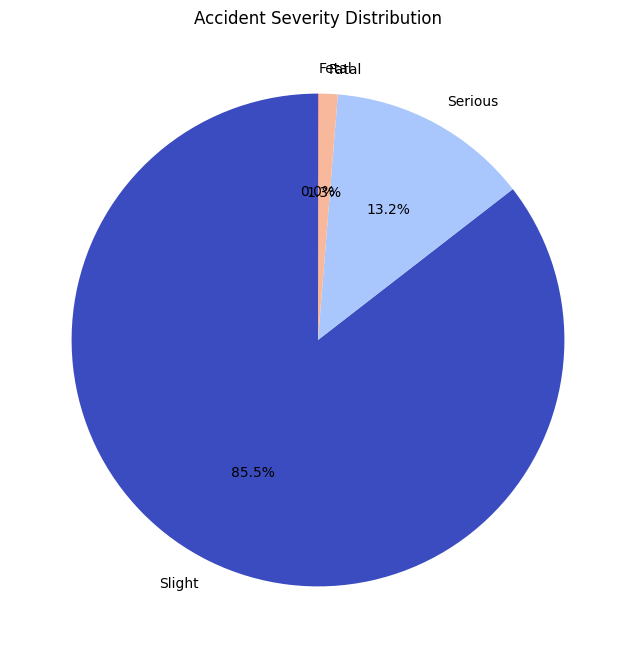

In [24]:
plt.figure(figsize=(8, 8))
df['Accident_Severity'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Accident Severity Distribution')
plt.ylabel('')
plt.show()

**Observations**
- Slight: 85.5% of accidents are classified as slight.
- Serious: 13.2% of accidents are classified as serious.
- Fatal: 1.3% of accidents result in fatalities.

### Heatmap: Correlation between Features

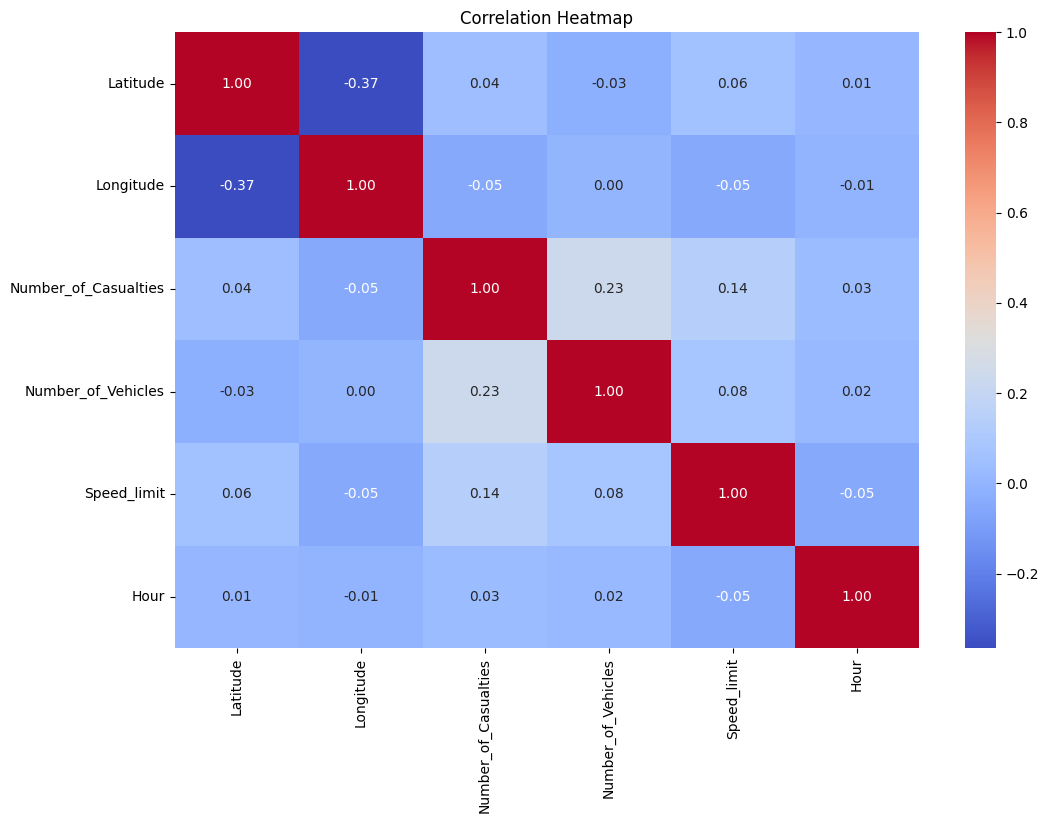

In [25]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Observations**
- Latitude and Longitude have a negative correlation, suggesting accidents cluster in certain regions.
- Casualties strongly correlate with Vehicles involved, indicating more vehicles leads to more severe accidents.
- Speed Limit and Time of Day both have a strong positive correlation with Casualties, pointing to their influence on accident severity.

###  Line Plot: Trend of Accidents Over Time

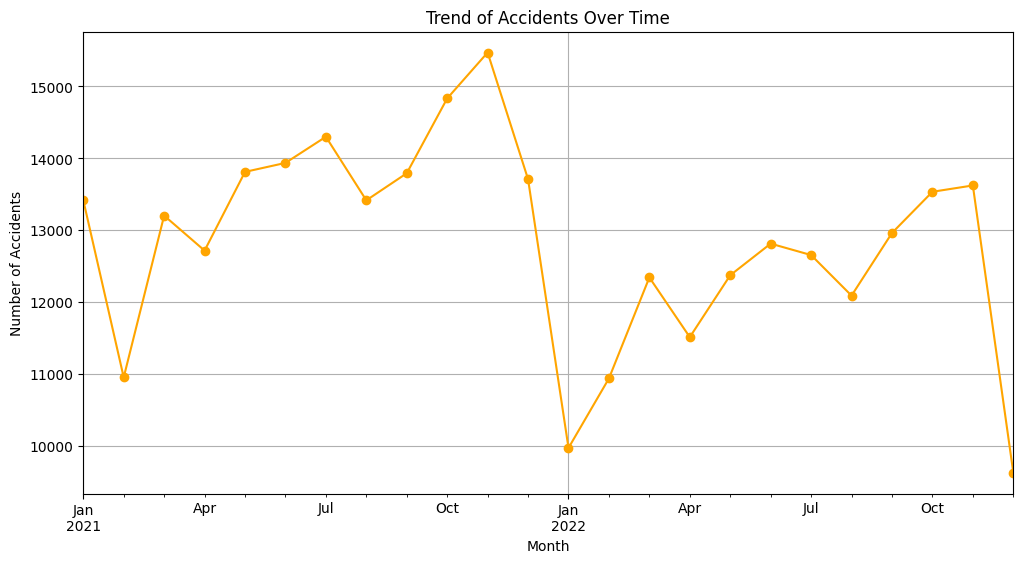

In [26]:
# Accidents per month
df['YearMonth'] = df['Accident Date'].dt.to_period('M')
monthly_accidents = df['YearMonth'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_accidents.plot(kind='line', marker='o', color='orange')
plt.title('Trend of Accidents Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


**Observations**
- Accidents fluctuated significantly over the time period, with sharp peaks and valleys.
- Highest peak was around October 2021, over 15,000 accidents.
- After the peak, accidents decreased sharply, reaching a low in January 2022.
- Then gradually increased again, with another peak around July 2022.
- Most recent data in October 2022 shows accidents declining but still relatively high.

### Box Plot: Accident Severity by Speed Limit

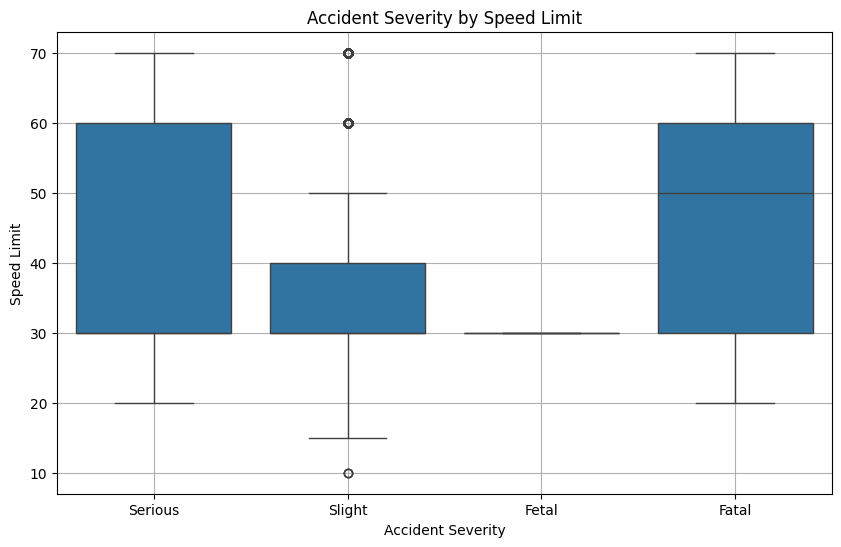

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accident_Severity', y='Speed_limit', data=df)
plt.title('Accident Severity by Speed Limit')
plt.xlabel('Accident Severity')
plt.ylabel('Speed Limit')
plt.grid(True)
plt.show()


**Observations**
- Serious accidents tend to occur at lower speed limits, around 50-60 mph.
- Slight accidents have a wider range of speed limits, with some occurring at lower speeds around 30-40 mph and others at higher speeds around 50-60 mph.
- Fatal accidents are more likely to happen at higher speed limits, with a peak around 60 mph.
- The speed limit distribution for fatal accidents is bimodal, with peaks at both lower and higher speed limits, suggesting multiple contributing factors.

### Accident Locations by Severity

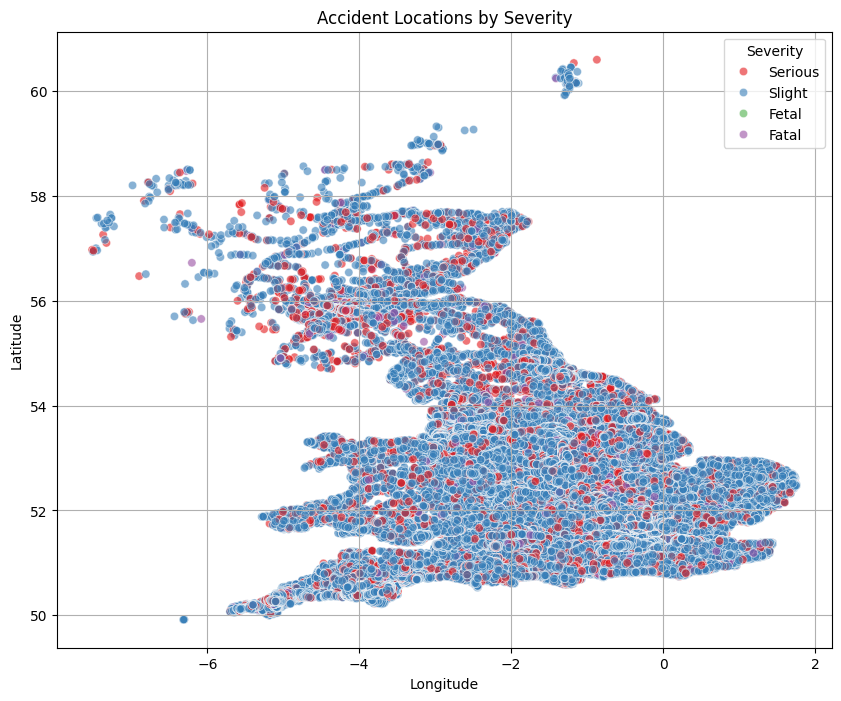

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Accident_Severity', data=df, palette='Set1', alpha=0.6)
plt.title('Accident Locations by Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Severity')
plt.grid(True)
plt.show()


**Observations**
- There is a wide dispersion of accident locations across the geographic area, with clusters of accidents in certain regions.
- Serious and slight accidents appear to be more evenly distributed across the region, while fatal and fatal accidents show some clustering in specific areas.
- The density of accident locations is higher in certain areas, suggesting there may be factors like road infrastructure, traffic patterns, or environmental conditions that contribute to the higher accident rates in those regions.

### Distribution of Speed Limits by Accident Severity

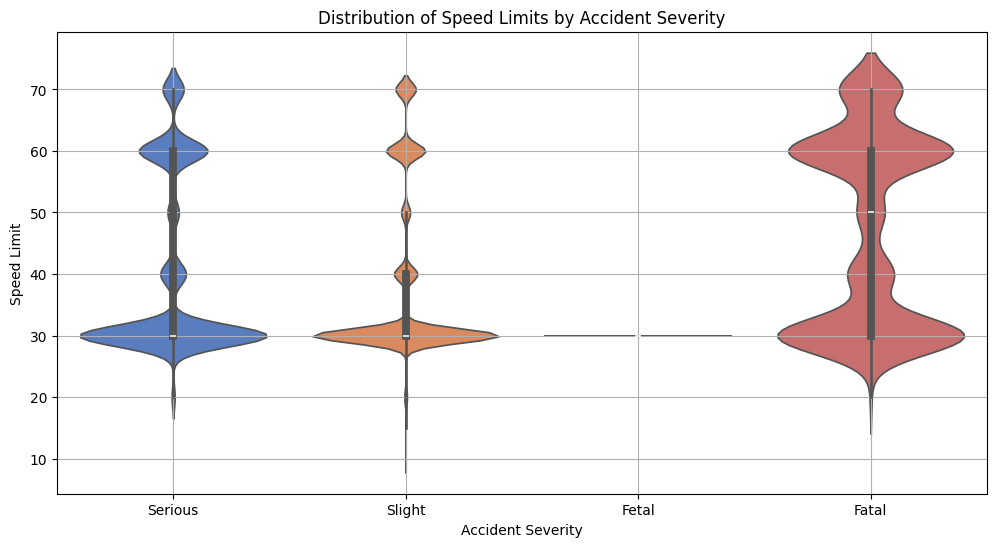

In [29]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Accident_Severity', y='Speed_limit', data=df, palette='muted', hue='Accident_Severity')
plt.title('Distribution of Speed Limits by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Speed Limit')
plt.grid(True)
plt.show()

**Observations**
- Serious accidents tend to occur more often at lower speed limits, around 30-40 mph.
- Slight accidents have a wider range of speed limits, with peaks around 30 mph and 50-60 mph.
- Fatal accidents are more likely to happen at higher speed limits, especially around 60 mph.
- The distribution for fatal accidents has a distinctive bimodal shape, with peaks at both lower and higher speed limits.

### Pair Plot of Casualties, Vehicles, and Speed Limit'

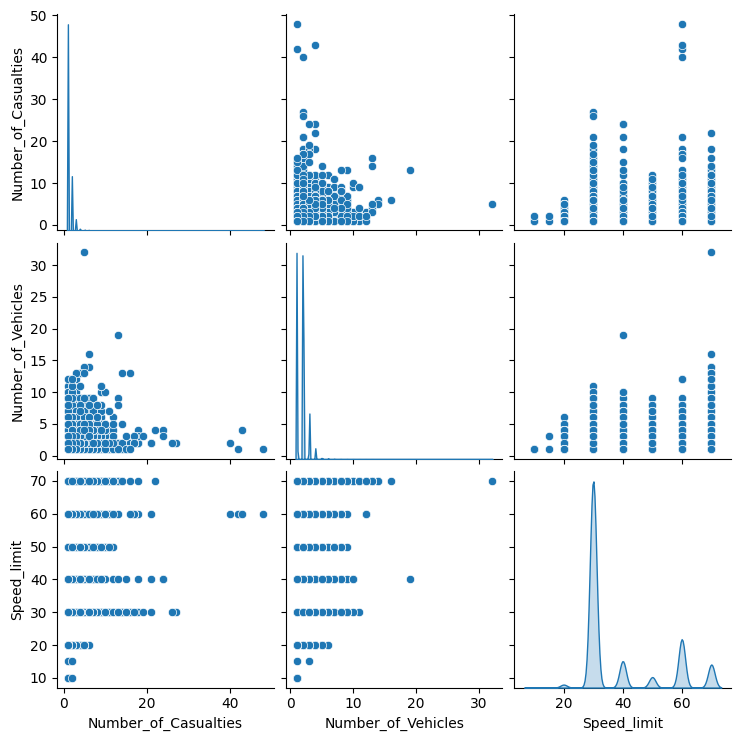

In [30]:
sns.pairplot(df[['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit']], diag_kind='kde')
plt.show()

**Observations**
- More vehicles = more casualties, especially 15-20 vehicles with ~40-45 casualties.
- Higher vehicle counts linked to more serious/fatal accidents.
- Speed limits around 30 and 60 mph, higher speeds tied to more fatal crashes.

### Bar Plot: Accidents by Junction Control

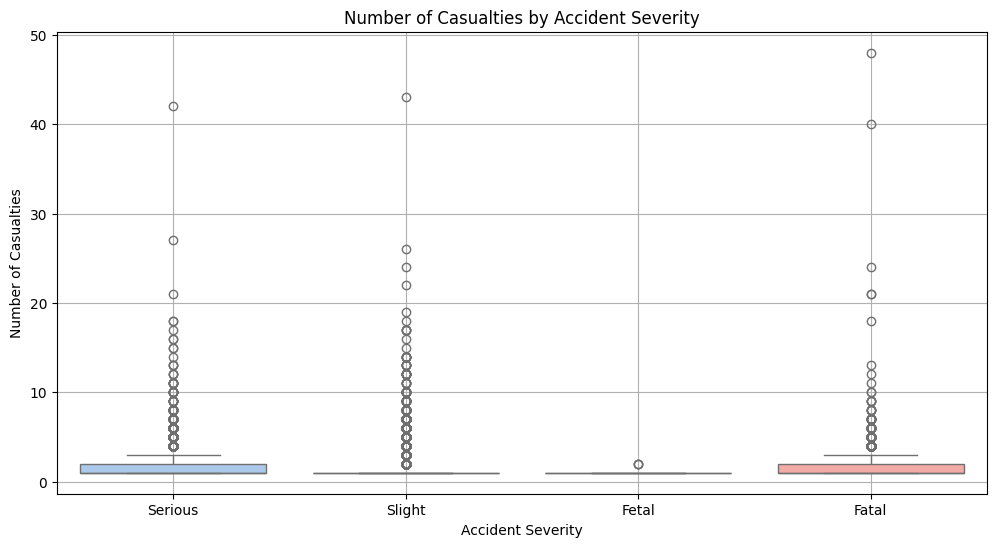

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Accident_Severity', y='Number_of_Casualties', data=df, palette='pastel', hue='Accident_Severity')
plt.title('Number of Casualties by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Casualties')
plt.grid(True)
plt.show()

**Observations**:
- Serious accidents typically have around 10-15 casualties.
- Slight accidents have a wider range, with most having around 5-15 casualties.
- Fatal accidents have the fewest casualties, generally around 1-5.
- The highest number of casualties, around 40-45, occurs in fatal accidents.

### Kernel Density Estimate of Number of Casualties

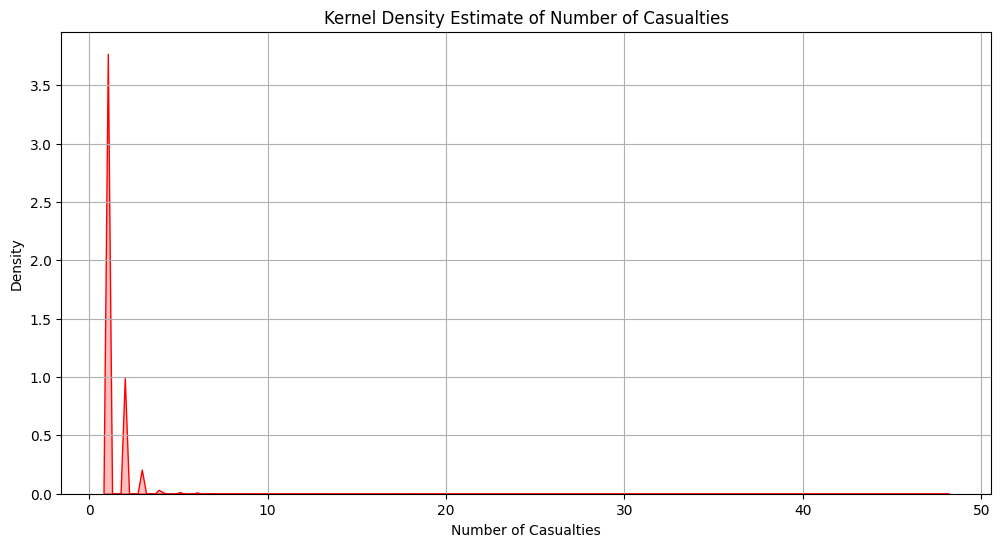

In [32]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Number_of_Casualties'], fill=True, color='r')
plt.title('Kernel Density Estimate of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Density')
plt.grid(True)
plt.show()

**Observations**:
- The density plot has a sharp peak around 1-2 casualties, indicating this is the most common number of casualties.
- There is a smaller peak around 10-15 casualties, suggesting some accidents have a higher number of casualties.
- The density decreases steadily as the number of casualties increases beyond 15, with very few accidents having more than 30 casualties.
- The overall distribution is skewed, with a longer tail on the right side, meaning there are some accidents with a large number of casualties, though they are less common.

###  Scatter Plot: Number of Casualties vs. Number of Vehicles

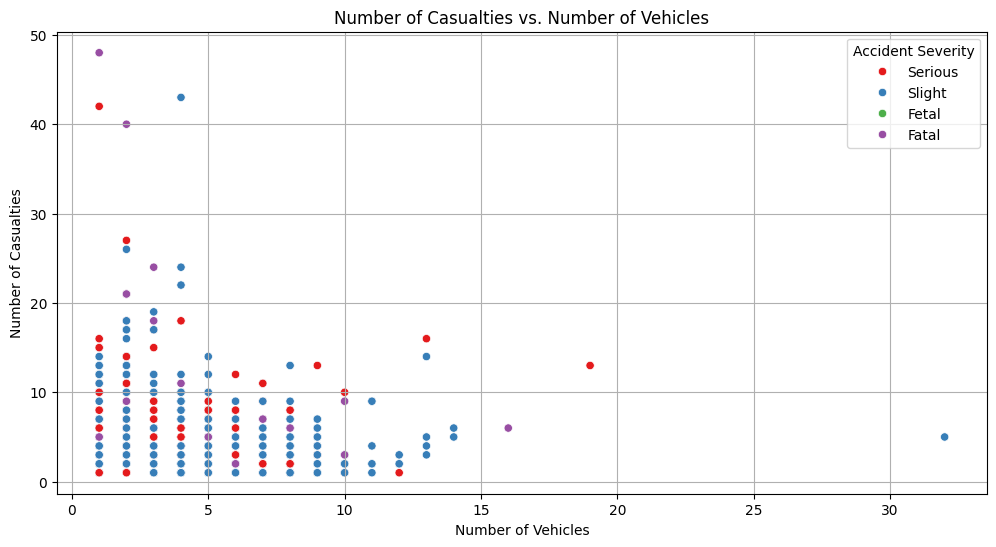

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Number_of_Vehicles', y='Number_of_Casualties', data=df, hue='Accident_Severity', palette='Set1')
plt.title('Number of Casualties vs. Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.legend(title='Accident Severity')
plt.grid(True)
plt.show()

**Observations:**
- Accidents with more vehicles tend to have higher numbers of casualties.
- Accidents with 15-20 vehicles had the highest number of casualties, around 45.
- Accidents with more vehicles (over 15) were more likely to have serious and fatal casualties.
- Accidents with fewer vehicles (under 10) had a mix of severity levels, with more slight and serious casualties compared to fatal.
- The relationship between vehicle count and casualty count is not perfectly linear, indicating other factors are involved.

### Heatmap of Accident Density by Hour and Day

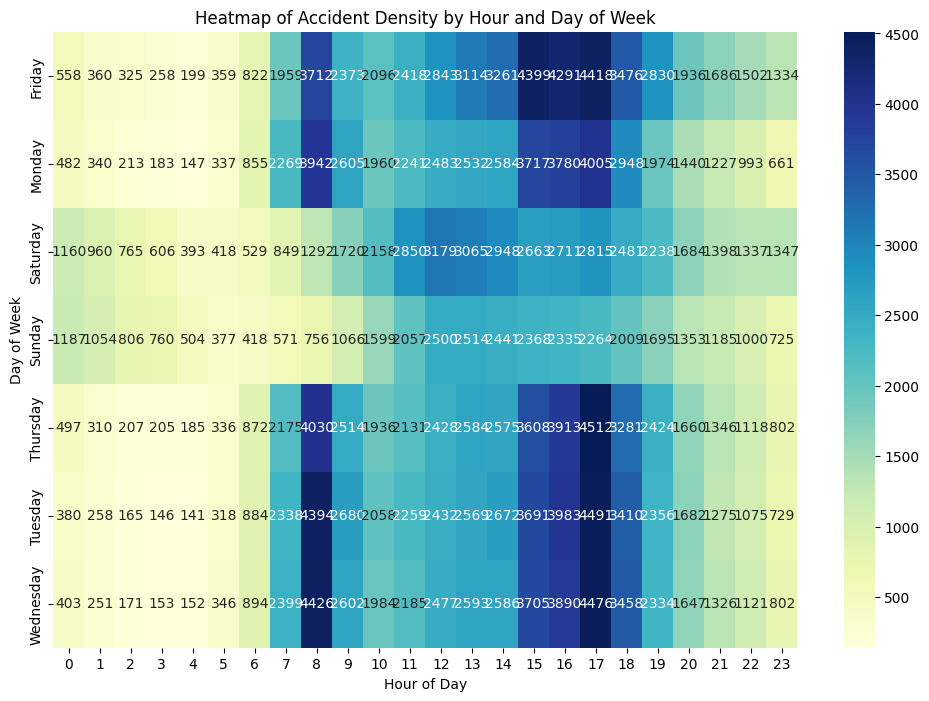

In [34]:
# Pivot table for hour and day of week
pivot_table = df.pivot_table(index='Day_of_Week', columns='Hour', values='Accident_Index', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Accident Density by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


**Observations:**
- Weekends, especially Fridays and Saturdays, have the highest accident densities, particularly in the late afternoon and evening hours.
- Early morning hours (1 AM to 6 AM) have the lowest accident densities throughout the week.
- Weekdays show increased accident densities during typical commute times (7-9 AM and 4-6 PM).
- The heatmap reveals clear patterns in accident frequency based on the time of day and day of the week, which can inform safety planning and interventions.

### Stacked Bar Plot: Accidents by Weather Conditions and Severity

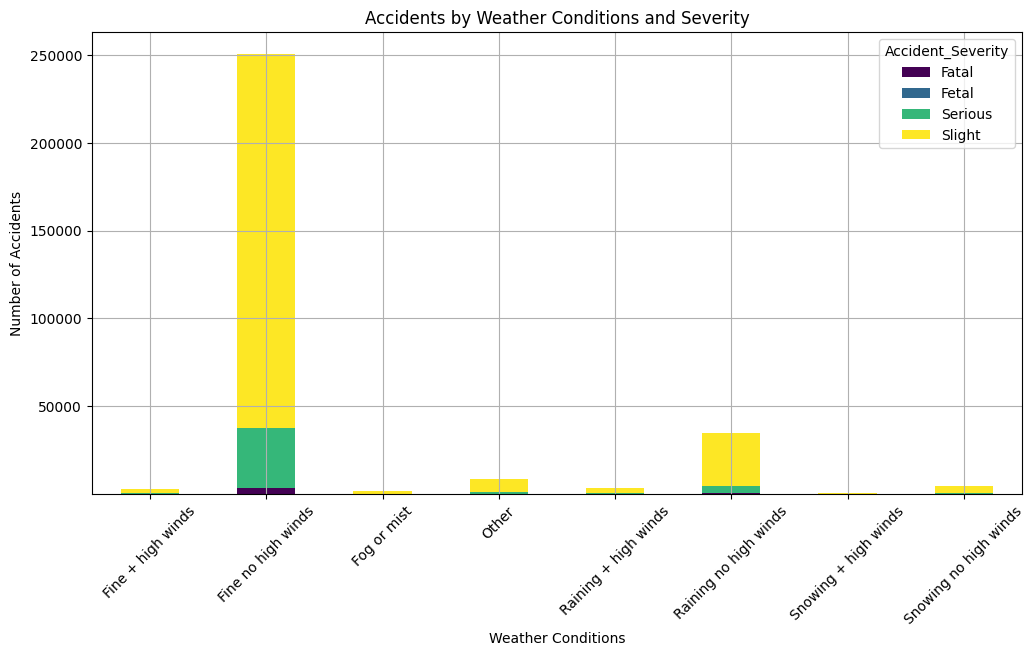

In [35]:
weather_severity = df.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack()

weather_severity.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Accidents by Weather Conditions and Severity')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Observations:**
- Fine weather (with or without high winds) had the highest number of accidents across all severity levels.
- Fog/mist and snowy conditions had the lowest number of accidents.
- Raining conditions had a moderate number of accidents.
- Fine weather had the highest proportion of slight and serious accidents, while snowy conditions had a higher proportion of fatal accidents.
- The data suggests weather conditions significantly impact accident frequency and severity.

----------